In [1]:
import pandas as pd
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("jena_climate_2009_2016.csv")


In [3]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [5]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:10:00,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 01:20:00,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
2009-01-01 01:30:00,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5


<Axes: xlabel='Date Time'>

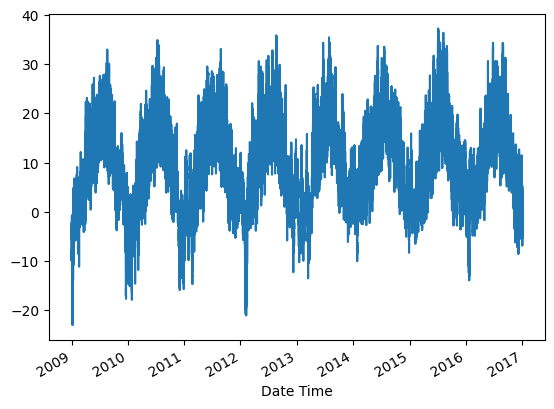

In [6]:
temp = df['T (degC)']
temp.plot()

In [7]:
# [1, 2, 3, 4, 5] [6]
# [2, 3, 4, 5, 6] [7]
# [3, 4, 5, 6, 7] [8]

import numpy as np

def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)



In [8]:
WINDOW_SIZE  = 5 
X,y =df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((420546, 5, 1), (420546,))

In [9]:
X_train, y_train = X[:350000], y[ :350000]
X_val, y_val = X[350000:380000], y[350000:380000]
X_test, y_test = X[350000:], y[ 350000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


((350000, 5, 1), (350000,), (30000, 5, 1), (30000,), (70546, 5, 1), (70546,))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError


model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))



In [11]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:

cp = ModelCheckpoint('model/best_model.keras', save_best_only=True)

model1.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.0001),
    metrics=[RootMeanSquaredError()]
)


In [13]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - loss: 16.6199 - root_mean_squared_error: 3.5931 - val_loss: 0.0355 - val_root_mean_squared_error: 0.1884
Epoch 2/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0506 - root_mean_squared_error: 0.2249 - val_loss: 0.0308 - val_root_mean_squared_error: 0.1756
Epoch 3/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0456 - root_mean_squared_error: 0.2136 - val_loss: 0.0312 - val_root_mean_squared_error: 0.1767
Epoch 4/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - loss: 0.0449 - root_mean_squared_error: 0.2118 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1814
Epoch 5/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - loss: 0.0442 - root_mean_squared_error: 0.2101 - val_loss: 0.0302 - val_root_mean_squared_error: 0.1739
Epoch 6/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - loss: 0.0445 - root_mean_squared_error: 0.2108 - val_loss: 0.0302 - val_root_mean_squared_error: 0.1738
Epoch 7/10
10938/1093

In [14]:
from tensorflow.keras.models import load_model
model1 = load_model('model/best_model.keras')



In [15]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train Predictions': train_predictions, ' Actuals': y_train})
train_results

10938/10938 ━━━━━━━━━━━━━━━━━━━━ 9s 771us/step


,Train Predictions,Actuals
0,-8.336584,-8.05
1,-7.948476,-7.62
2,-7.422402,-7.62
3,-7.663040,-7.91
4,-8.007943,-8.43
...,...,...
349995,17.567329,17.84
349996,17.828293,17.89
349997,17.803877,17.60
349998,17.373693,16.70


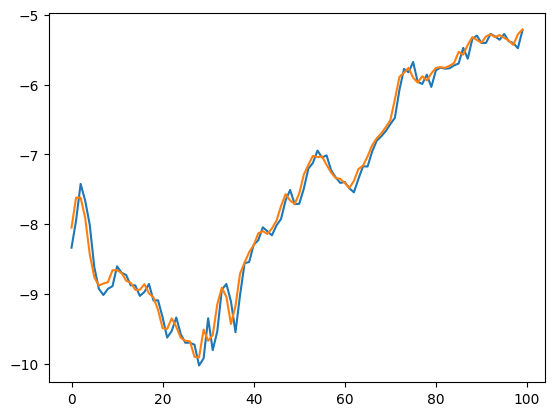

In [16]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results[' Actuals'][:100])

In [17]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data = {'Val Predictions': val_predictions, 'Actuals':y_val})
val_results

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step


,Val Predictions,Actuals
0,15.534244,15.89
1,15.831919,16.26
2,16.251202,16.24
3,16.090425,15.88
4,15.705163,15.37
...,...,...
29995,4.335863,4.33
29996,4.371637,4.35
29997,4.372953,4.40
29998,4.442900,4.55


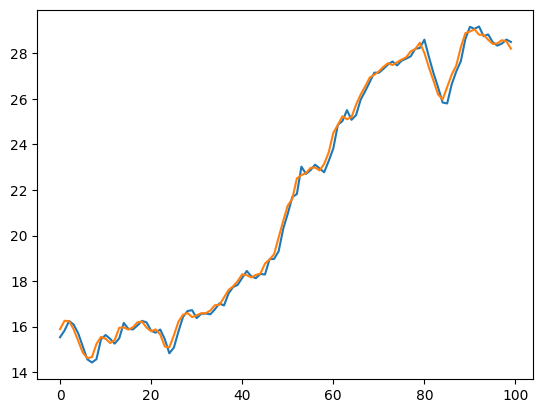

In [18]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [19]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data = {'test Predictions': test_predictions, 'Actuals':y_test})
test_results

2205/2205 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step


,test Predictions,Actuals
0,15.534244,15.89
1,15.831919,16.26
2,16.251202,16.24
3,16.090425,15.88
4,15.705163,15.37
...,...,...
70541,-4.068816,-4.05
70542,-4.005277,-3.35
70543,-2.972390,-3.16
70544,-3.226629,-4.23


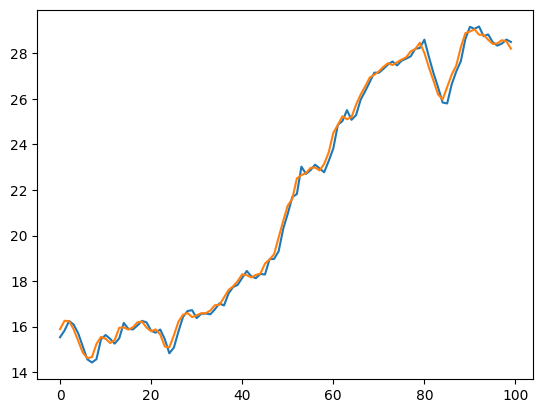

In [20]:
plt.plot(test_results['test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [21]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end = 100):
    predictions =  model.predict(X).flatten()
    df= pd.DataFrame(data= {'Predictions': predictions, 'Actuals':y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start : end])
    return df, mse(y, predictions)

2205/2205 ━━━━━━━━━━━━━━━━━━━━ 2s 766us/step


(       Predictions  Actuals
 0        15.534244    15.89
 1        15.831919    16.26
 2        16.251202    16.24
 3        16.090425    15.88
 4        15.705163    15.37
 ...            ...      ...
 70541    -4.068816    -4.05
 70542    -4.005277    -3.35
 70543    -2.972390    -3.16
 70544    -3.226629    -4.23
 70545    -4.528040    -4.82
 
 [70546 rows x 2 columns],
 0.039542572555323605)

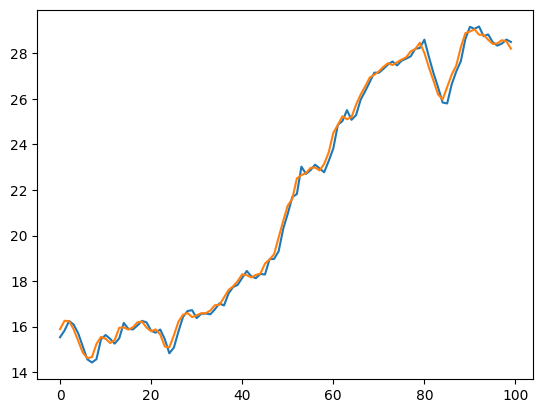

In [24]:
plot_predictions1(model1, X_test, y_test)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv1D, Flatten, Dense

model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         2,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257 (8.82 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
cp2 = ModelCheckpoint('model2/best_model.keras', save_best_only=True)

model2.compile(
    loss=MeanSquaredError(), 
    optimizer=Adam(learning_rate=0.0001), 
    metrics=[RootMeanSquaredError()]
)


In [32]:
model2.fit( X_train, y_train,  validation_data=(X_val, y_val), epochs=10, callbacks=[ cp2])

Epoch 1/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 15.4179 - root_mean_squared_error: 3.3142 - val_loss: 0.1015 - val_root_mean_squared_error: 0.3186
Epoch 2/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.0964 - root_mean_squared_error: 0.3088 - val_loss: 0.0353 - val_root_mean_squared_error: 0.1878
Epoch 3/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 0.0482 - root_mean_squared_error: 0.2195 - val_loss: 0.0332 - val_root_mean_squared_error: 0.1823
Epoch 4/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.0458 - root_mean_squared_error: 0.2140 - val_loss: 0.0373 - val_root_mean_squared_error: 0.1931
Epoch 5/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0462 - root_mean_squared_error: 0.2149 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1760
Epoch 6/10
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 0.0456 - root_mean_squared_error: 0.2134 - val_loss: 0.0316 - val_root_mean_squared_error: 0.1776
Epoch 7/10
10938/1093